In [3]:
import pandas as pd
dfs = pd.read_csv('../data/experimental_nucl_mut.csv')
my_list = dfs['Residue'].tolist()

In [4]:
import pandas as pd
#load results of Evo2 predictions
result_df= pd.read_csv('../data/result_df.csv')
result_df = result_df.iloc[1:].reset_index(drop=True)
result_df

,variant_name,ref_seq,mut_seq,ref_score,mut_score,delta_score
0,T-1-A-a,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.959835,-0.005349
1,S-21-A-a,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.961840,-0.007353
2,S-22-A-a,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.955226,-0.000740
3,G-23-A-a,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.960332,-0.005846
4,A-46-A-a,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.955202,-0.000716
...,...,...,...,...,...,...
1275,G-129---c,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.982843,-0.028357
1276,S-130---c,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.981798,-0.027312
1277,S-132---c,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.968863,-0.014377
1278,Y-136---c,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,ATGTTGGCAGATTTTGAAAGTGTTCTCCGCTCGGAGTTCTCCCTGA...,-0.954486,-0.971387,-0.016900


In [5]:
def extract_variant_position(variant):
    parts = variant.split('-')
    return parts[0] + parts[1]

result_df['variant_pos'] = result_df['variant_name'].apply(extract_variant_position)

# Step 2: Group delta_scores by variant position
grouped = result_df.groupby('variant_pos')['delta_score'].apply(list)

# Step 3: Convert into DataFrame with one column per variant_pos
max_len = grouped.map(len).max()
expanded = pd.DataFrame({col: vals + [None]*(max_len - len(vals)) for col, vals in grouped.items()})
expanded.insert(0, "Residue", my_list)
expanded.set_index("Residue", inplace=True)

In [6]:
import re

def numeric_key(col_name):
    # Extract number after first letter(s)
    match = re.search(r'\d+', col_name)
    return int(match.group()) if match else float('inf')

cols_to_sort = expanded.columns.tolist()

# Sort columns numerically by their embedded number
sorted_cols = sorted(cols_to_sort, key=numeric_key)

# Reorder DataFrame columns
expanded = expanded[sorted_cols]

In [7]:
#Set binary all of them by a cutoff
expanded_matrix = (expanded < -0.0135).astype(int) * 1
expanded_matrix 

,T1,S21,S22,G23,A46,G47,G48,S96,M97,G98,Y113,D115,D116,S127,V128,G129,S130,S132,Y136,A169
Residue,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
Y,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
*,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1


/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_17157/4048636993.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


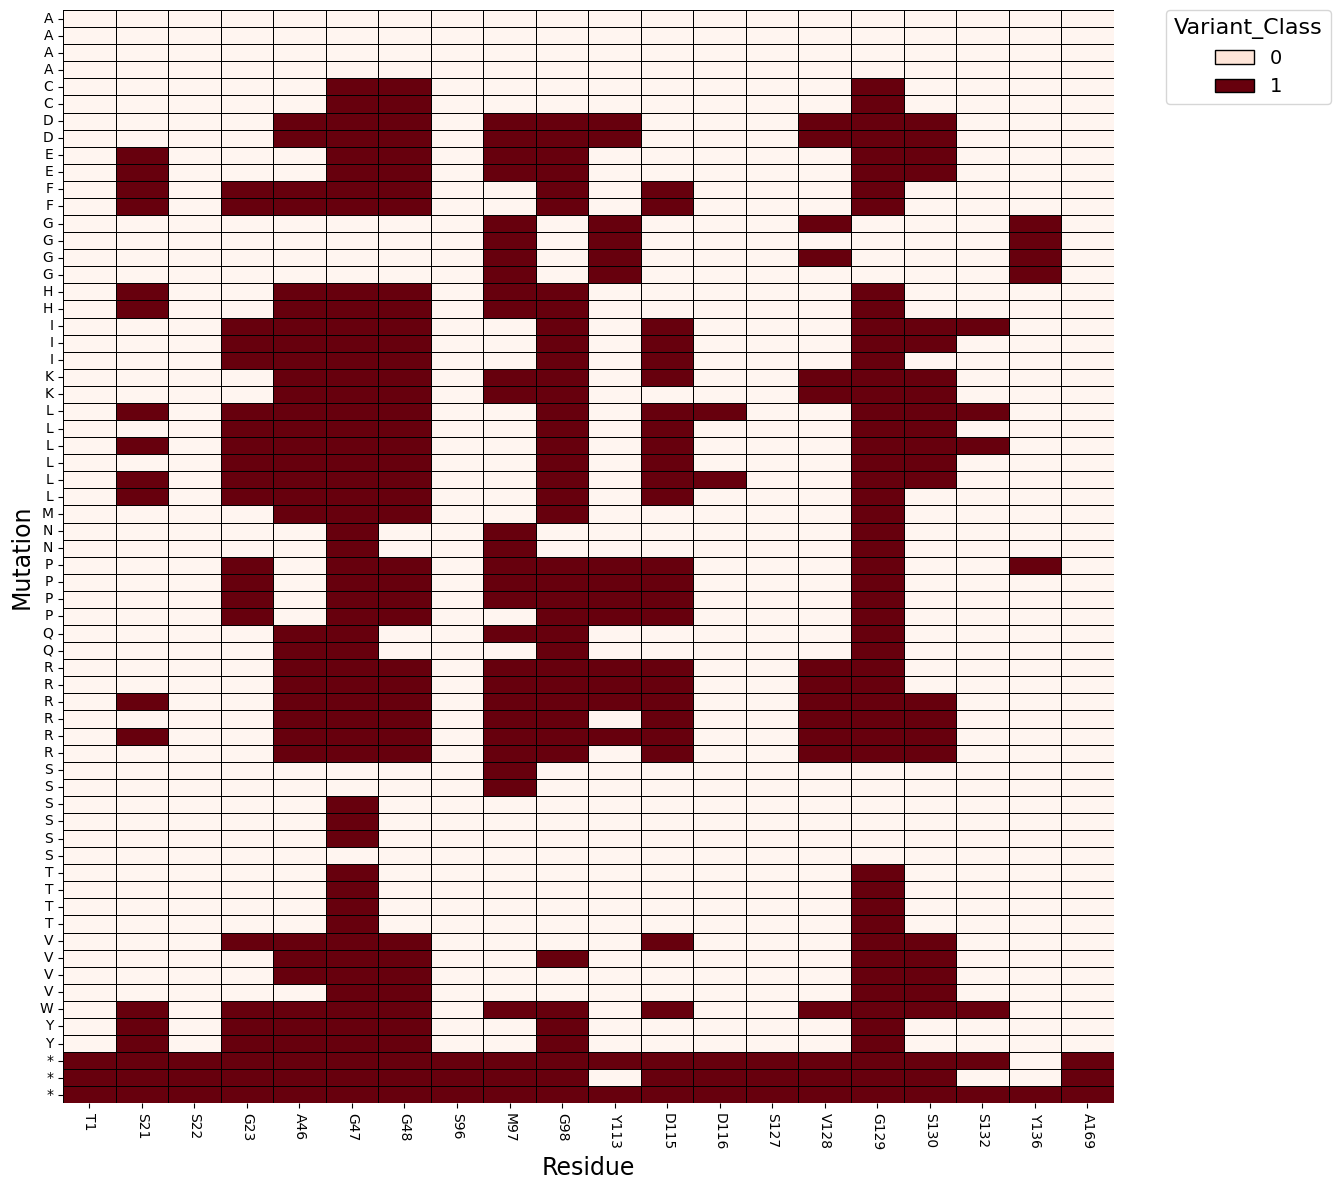

In [8]:
#Plot all condons encoding mutations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.cm as cm
import matplotlib.colors as mcolors

cutoff_min = 0
cutoff_max = 1

plt.figure(figsize=(16, 12))
ax = sns.heatmap(
    expanded_matrix,
    annot=False,
    cmap="Reds",
    vmin=cutoff_min,
    vmax=cutoff_max,
    linewidths=0.5,
    linecolor='black',
    cbar=False
)

# Get the Reds colormap
cmap = cm.get_cmap('Reds')

# Get color for 0 (lightest) and 1 (darkest)
color_for_0 = cmap(0.1)  # slightly above 0 for visible color (pure 0 is almost white)
color_for_1 = cmap(1.0)

# Create legend patches with exact colors from colormap
legend_elements = [
    Patch(facecolor=color_for_0, edgecolor='black', label='0'),
    Patch(facecolor=color_for_1, edgecolor='black', label='1')
]

plt.legend(
    handles=legend_elements,
    title='Variant_Class',
    fontsize=14,
    title_fontsize=16,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    frameon=True
)

plt.xlabel("Residue", fontsize=17)
plt.ylabel("Mutation", fontsize=17)
plt.xticks(rotation=270, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("")
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [10]:
#Average codons encoding for the same residue mutation
averaged_matrix = expanded.groupby(expanded.index).mean()
#Create a new binary matrix with a specific cutoff
new_matrix = (averaged_matrix < -0.0135).astype(int) * 1
new_matrix 

,T1,S21,S22,G23,A46,G47,G48,S96,M97,G98,Y113,D115,D116,S127,V128,G129,S130,S132,Y136,A169
Residue,,,,,,,,,,,,,,,,,,,,
*,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
D,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,0,0,0
E,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0
F,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0
G,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
H,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0
I,0,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0


/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_17157/4271019883.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds')


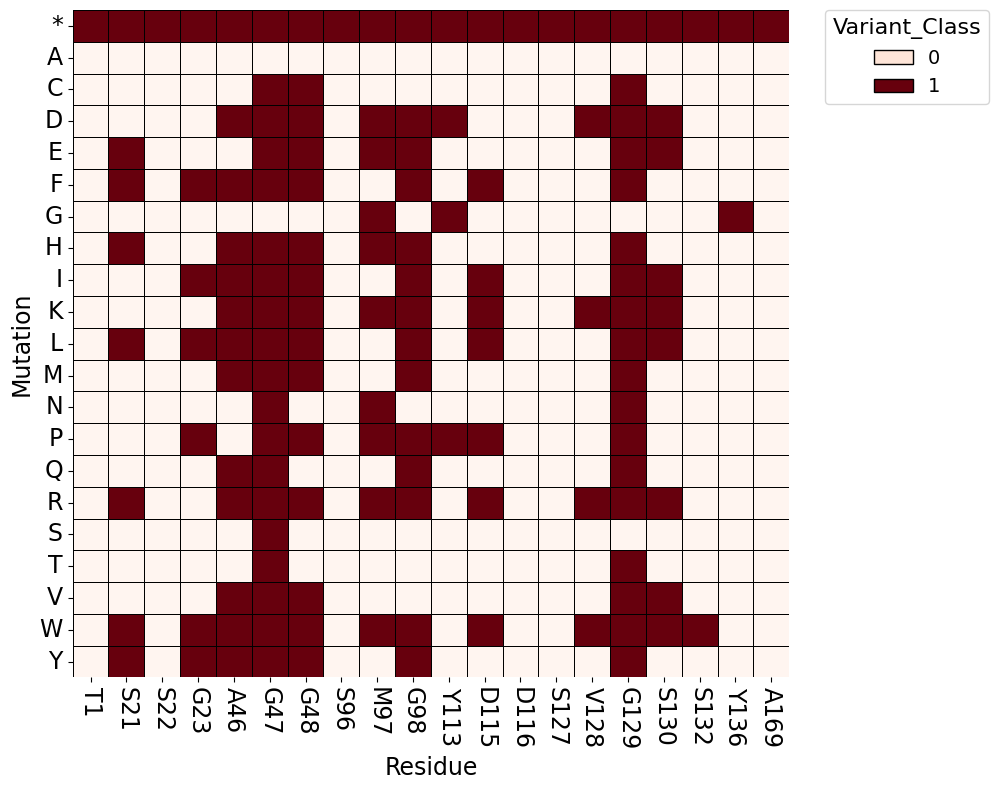

In [11]:
#Create a binary heatmap for averages
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.cm as cm
import matplotlib.colors as mcolors

cutoff_min = 0
cutoff_max = 1

plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    new_matrix,
    annot=False,
    cmap="Reds",
    vmin=cutoff_min,
    vmax=cutoff_max,
    linewidths=0.5,
    linecolor='black',
    cbar=False
)

# Get the Reds colormap
cmap = cm.get_cmap('Reds')

# Get color for 0 (lightest) and 1 (darkest)
color_for_0 = cmap(0.1)  # slightly above 0 for visible color (pure 0 is almost white)
color_for_1 = cmap(1.0)

# Create legend patches with exact colors from colormap
legend_elements = [
    Patch(facecolor=color_for_0, edgecolor='black', label='0'),
    Patch(facecolor=color_for_1, edgecolor='black', label='1')
]

plt.legend(
    handles=legend_elements,
    title='Variant_Class',
    fontsize=14,
    title_fontsize=16,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    frameon=True
)

plt.xlabel("Residue", fontsize=17)
plt.ylabel("Mutation", fontsize=17)
plt.xticks(rotation=270, fontsize=17)
plt.yticks(rotation=0, fontsize=17)
plt.title("")
plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space on right for legend

plt.show()

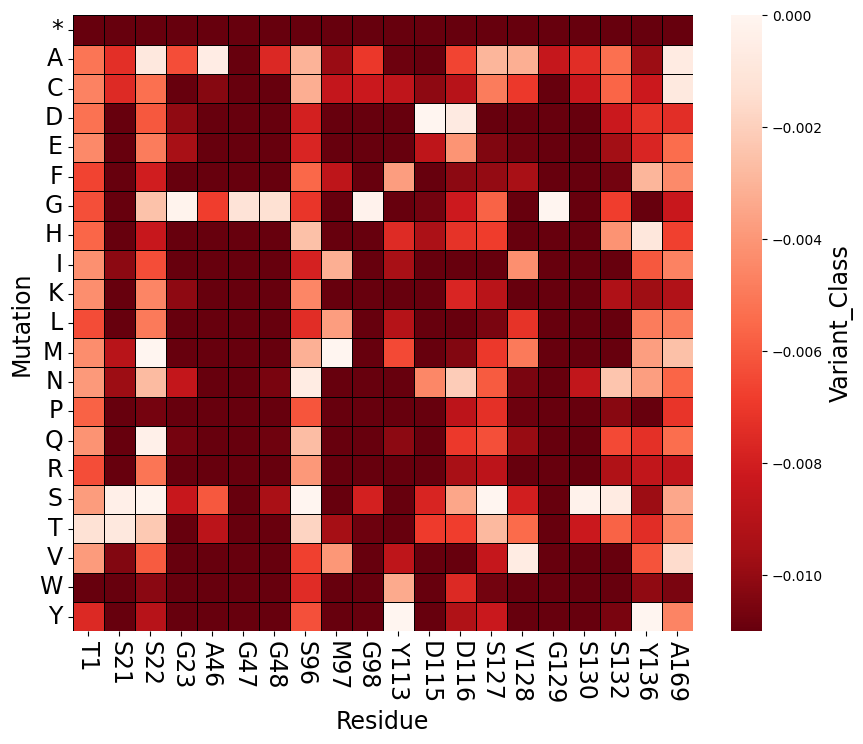

In [14]:
#We can also analize all average values in a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfc is your DataFrame, and the first column contains the letters
# Set the first column as the index
#df2.set_index(df2.columns[1], inplace=False)
#matrix_df3.set_index('Mutation', inplace=True)

cutoff_min = 0  # Set the minimum value for the cutoff
cutoff_max = -0.010  # Set the maximum value for the cutoff

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
ax = sns.heatmap(averaged_matrix, annot=False, cmap="Reds_r", vmin=cutoff_min, vmax=cutoff_max, 
            linewidths=0.5, linecolor='black', 
            cbar_kws={'label': 'Variant_Class'})
ax.figure.axes[-1].yaxis.label.set_size(17)
# Optional: Add labels and title
plt.xlabel("Residue", fontsize=17)
plt.ylabel("Mutation", fontsize=17)
plt.xticks(rotation=270,fontsize=17)
plt.yticks(rotation=0, fontsize=17)
plt.title("")

plt.show()

In [43]:
import pandas as pd
m_all = pd.read_csv('../data/cluster_combined_matrix.csv')
m_all = m_all.drop(columns=['Unnamed: 0'])
m_all

,Mutation,T1,S21,S22,G23,A46,G47,G48,S96,M97,...,Y113,D115,D116,S127,V128,G129,S130,S132,Y136,A169
0,A,1.66425,0.21225,-0.19925,-0.86150,0.00000,0.33725,0.00550,-0.07750,0.07700,...,10.38500,0.24075,-0.74800,-0.02625,4.18650,-0.87475,-0.20875,5.695,2.48425,0.00000
1,C,1.55175,0.09225,-0.09475,0.17175,-0.06175,1.53375,-0.54250,-0.73925,0.59325,...,9.45350,0.11775,-1.04800,-0.21675,3.13375,-2.85225,-1.27625,5.053,2.44250,0.36525
2,D,1.50550,0.04600,0.11325,-0.47575,3.25450,7.30500,-0.01850,0.72000,0.71625,...,10.22625,0.37825,0.00000,0.03725,7.11675,1.44300,1.14625,19.288,3.19400,-1.57125
3,E,-0.48975,-0.75050,0.15025,-0.54550,1.83425,0.67750,-0.24350,0.26600,0.38950,...,8.35700,0.74650,-0.27675,0.88775,3.81550,1.27050,-3.02650,9.795,3.26625,-1.61850
4,F,-3.43450,-2.66000,-0.12200,-1.31750,-1.25150,15.07275,0.28325,-2.01100,0.16850,...,3.66575,-2.26675,-2.91450,-0.40150,3.79600,-2.44375,-0.15150,7.162,1.24700,-3.14850
5,G,3.87450,1.62600,-0.39625,0.00000,1.05850,0.00000,0.00000,0.06025,0.18875,...,10.72050,1.57500,-0.08250,0.09450,7.39800,0.00000,0.40775,6.486,2.81975,1.17225
6,H,-1.30400,-3.59175,-0.46975,-0.68725,0.90575,4.99425,-0.86575,-2.66225,-0.55950,...,4.75875,-1.29225,-1.13350,-0.88125,1.32075,-5.28325,-1.92925,6.189,2.28300,-1.38675
7,I,-1.83725,-0.98050,-0.49775,-1.92375,0.02750,-0.70900,-2.97250,-1.49275,0.71925,...,8.13725,0.20900,-0.97250,-0.40975,-1.48250,2.02375,-2.32575,10.243,1.92575,-2.29425
8,K,3.46050,3.22775,0.27500,0.90925,4.42625,5.02425,0.05300,-1.62775,0.15475,...,12.02850,3.15400,-0.76600,-0.02100,9.03200,-1.67975,0.10500,2.659,1.68575,1.72150
9,L,-3.46900,-1.68250,-0.68225,-1.98675,-1.24525,-2.08650,-1.75650,-2.99600,0.51800,...,7.78050,0.40100,-1.67250,0.85000,2.08250,-2.21150,-3.49800,2.496,1.65075,-2.74650


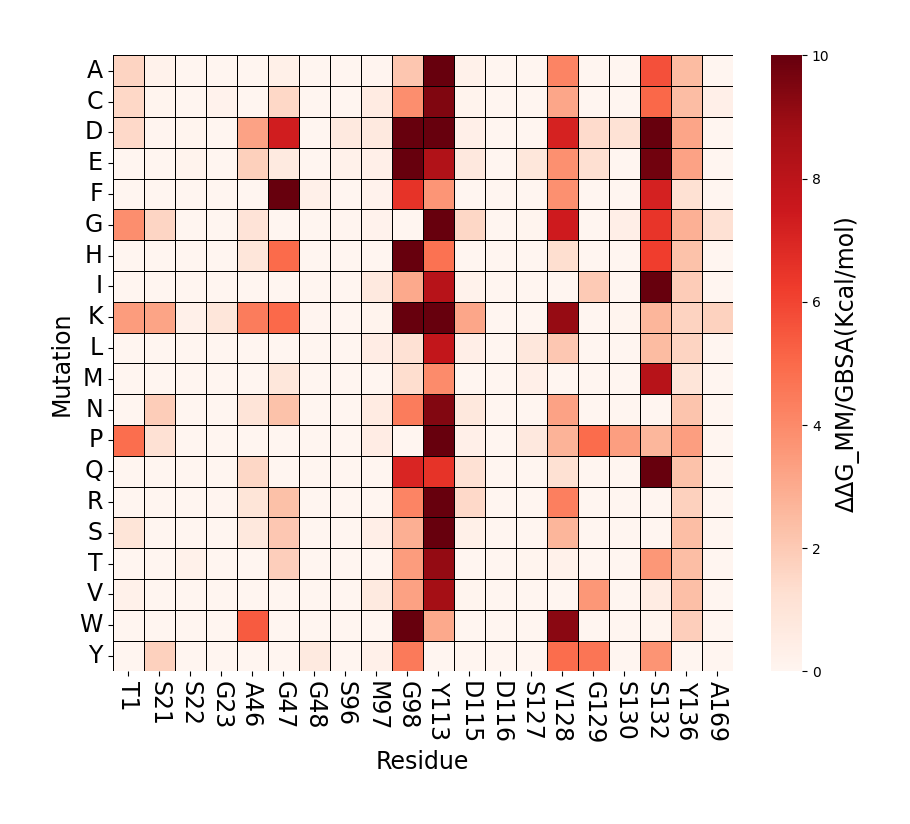

In [44]:
#Plot the original heatmap
import seaborn as sns
import matplotlib.pyplot as plt

m_all2 = m_all.copy()
m_all2.set_index('Mutation', inplace=True)

cutoff_min = 0  # Set the minimum value for the cutoff
cutoff_max = 10  # Set the maximum value for the cutoff

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
ax = sns.heatmap(m_all2, annot=False, cmap="Reds", vmin=cutoff_min, vmax=cutoff_max, linewidths=0.5, linecolor='black', cbar_kws={'label': 'ΔΔG_MM/GBSA(Kcal/mol)'})
ax.figure.axes[-1].yaxis.label.set_size(17)
# Optional: Add labels and title
plt.xlabel("Residue", fontsize=17)
plt.ylabel("Mutation", fontsize=17)
plt.xticks(rotation=270,fontsize=17)
plt.yticks(rotation=0, fontsize=17)
plt.xlabel("Residue")
plt.ylabel("Mutation")
plt.title("")
plt.show()

In [45]:
new_matrixb = new_matrix.reset_index().rename(columns={"index": "Residue"})
new_matrixb = new_matrixb.iloc[1:].reset_index(drop=True)
new_matrixb

,Residue,T1,S21,S22,G23,A46,G47,G48,S96,M97,...,Y113,D115,D116,S127,V128,G129,S130,S132,Y136,A169
0,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,D,0,0,0,0,1,1,1,0,1,...,1,0,0,0,1,1,1,0,0,0
3,E,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,0
4,F,0,1,0,1,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,G,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
6,H,0,1,0,0,1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
7,I,0,0,0,1,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
8,K,0,0,0,0,1,1,1,0,1,...,0,1,0,0,1,1,1,0,0,0
9,L,0,1,0,1,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0


In [46]:
import pandas as pd

# First column is mutation
value_cols = m_all.columns[1:]  # Skip mutation column

# Set df1 values to 0 where df2 values == 1 in Evo2 binary predictions(new_matrixb)
m_all.loc[:, value_cols] = m_all.loc[:, value_cols].mask(new_matrixb.loc[:, value_cols] == 1, 0)
m_all

,Mutation,T1,S21,S22,G23,A46,G47,G48,S96,M97,...,Y113,D115,D116,S127,V128,G129,S130,S132,Y136,A169
0,A,1.66425,0.21225,-0.19925,-0.86150,0.00000,0.33725,0.00550,-0.07750,0.07700,...,10.38500,0.24075,-0.74800,-0.02625,4.18650,-0.87475,-0.20875,5.695,2.48425,0.00000
1,C,1.55175,0.09225,-0.09475,0.17175,-0.06175,0.00000,0.00000,-0.73925,0.59325,...,9.45350,0.11775,-1.04800,-0.21675,3.13375,0.00000,-1.27625,5.053,2.44250,0.36525
2,D,1.50550,0.04600,0.11325,-0.47575,0.00000,0.00000,0.00000,0.72000,0.00000,...,0.00000,0.37825,0.00000,0.03725,0.00000,0.00000,0.00000,19.288,3.19400,-1.57125
3,E,-0.48975,0.00000,0.15025,-0.54550,1.83425,0.00000,0.00000,0.26600,0.00000,...,8.35700,0.74650,-0.27675,0.88775,3.81550,0.00000,0.00000,9.795,3.26625,-1.61850
4,F,-3.43450,0.00000,-0.12200,0.00000,0.00000,0.00000,0.00000,-2.01100,0.16850,...,3.66575,0.00000,-2.91450,-0.40150,3.79600,0.00000,-0.15150,7.162,1.24700,-3.14850
5,G,3.87450,1.62600,-0.39625,0.00000,1.05850,0.00000,0.00000,0.06025,0.00000,...,0.00000,1.57500,-0.08250,0.09450,7.39800,0.00000,0.40775,6.486,0.00000,1.17225
6,H,-1.30400,0.00000,-0.46975,-0.68725,0.00000,0.00000,0.00000,-2.66225,0.00000,...,4.75875,-1.29225,-1.13350,-0.88125,1.32075,0.00000,-1.92925,6.189,2.28300,-1.38675
7,I,-1.83725,-0.98050,-0.49775,0.00000,0.00000,0.00000,0.00000,-1.49275,0.71925,...,8.13725,0.00000,-0.97250,-0.40975,-1.48250,0.00000,0.00000,10.243,1.92575,-2.29425
8,K,3.46050,3.22775,0.27500,0.90925,0.00000,0.00000,0.00000,-1.62775,0.00000,...,12.02850,0.00000,-0.76600,-0.02100,0.00000,0.00000,0.00000,2.659,1.68575,1.72150
9,L,-3.46900,0.00000,-0.68225,0.00000,0.00000,0.00000,0.00000,-2.99600,0.51800,...,7.78050,0.00000,-1.67250,0.85000,2.08250,0.00000,0.00000,2.496,1.65075,-2.74650


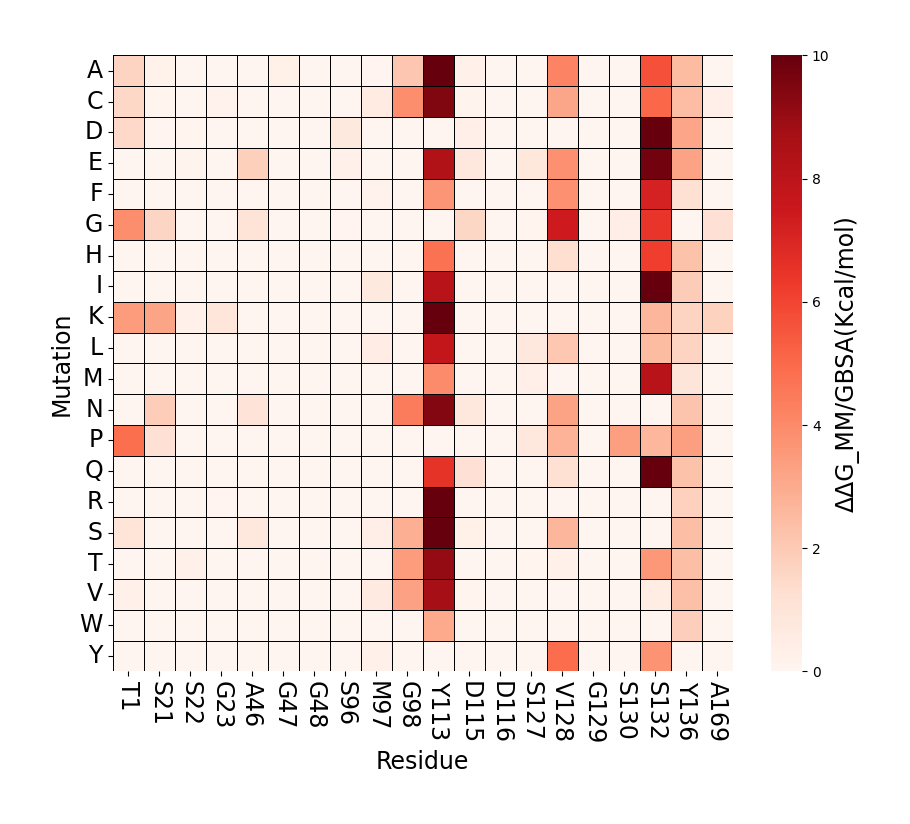

In [47]:
#Plot the clean heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfc is your DataFrame, and the first column contains the letters
# Set the first column as the index
#df2.set_index(df2.columns[1], inplace=False)
m_all.set_index('Mutation', inplace=True)

cutoff_min = 0  # Set the minimum value for the cutoff
cutoff_max = 10  # Set the maximum value for the cutoff

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
ax = sns.heatmap(m_all, annot=False, cmap="Reds", vmin=cutoff_min, vmax=cutoff_max, linewidths=0.5, linecolor='black', cbar_kws={'label': 'ΔΔG_MM/GBSA(Kcal/mol)'})
ax.figure.axes[-1].yaxis.label.set_size(17)
# Optional: Add labels and title
plt.xlabel("Residue", fontsize=17)
plt.ylabel("Mutation", fontsize=17)
plt.xticks(rotation=270,fontsize=17)
plt.yticks(rotation=0, fontsize=17)
plt.xlabel("Residue")
plt.ylabel("Mutation")
plt.title("")

plt.show()

In [27]:
#I have prepared the csv already with experimental and predicted data
import pandas as pd
df1 = pd.read_csv('../data/Information_per_circle_plot.csv')
df1 = df1.iloc[:, 1:]
df1

,Mutation,Residue_Conc,Resistance,Residue,Source,Full_residuem
0,A,T1_Exp,0.00000,T1,Exp,T1A
1,C,T1_Exp,0.00000,T1,Exp,T1C
2,D,T1_Exp,0.00000,T1,Exp,T1D
3,E,T1_Exp,0.00000,T1,Exp,T1E
4,F,T1_Exp,0.00000,T1,Exp,T1F
...,...,...,...,...,...,...
795,S,A169_Pred,-1.01325,A169,Pred,A169S
796,T,A169_Pred,-2.98425,A169,Pred,A169T
797,V,A169_Pred,0.00000,A169,Pred,A169V
798,W,A169_Pred,-5.33550,A169,Pred,A169W


In [28]:
#We set A and B as flags for the class data
df1['Source'] = df1['Source'].replace({
    'Exp': 'A',
    'Pred': 'B'
})

In [29]:
#we create a dictionary for data to get ready to plot
name_map = {
    'T1': 'T1',
    'S21': 'S21',
    'S22': 'S22',
    'G23': 'G23',
    'A46': 'A46',
    'G47': 'G47',
    'G48': 'G48',
    'S96': 'S96',
    'M97': 'M97',
    'G98': 'G98',
    'Y113': 'Y113',
    'D115': 'D115',
    'D116': 'D116',
    'S127': 'S127',
    'V128': 'V128',
    'G129': 'G129',
    'S130': 'S130',
    'S132': 'S132',
    'Y136': 'Y136',
    'A169': 'A169'
}

grouped = df1.groupby('Residue', sort=False)
Residues_df = {name_map[name]: group for name, group in grouped}

/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_17157/21612821.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reshaped_df = pd.concat([reshaped_df, mut_condition_row])
/Users/cmendozamartinez001/miniconda3/envs/prolif/lib/python3.13/site-packages/pycirclize/sector.py:159: UserWarning: r_lim=(155, 190) is unexpected plot range (0 <= r <= 100).
  warnings.warn(f"{r_lim=} is unexpected plot range (0 <= r <= 100).")
/Users/cmendozamartinez001/miniconda3/envs/prolif/lib/python3.13/site-packages/pycirclize/sector.py:159: UserWarning: r_lim=(35, 150) is unexpected plot range (0 <= r <= 100).
  warnings.warn(f"{r_lim=} is unexpected plot range (0 <= r <= 100).")
/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_17157/21612

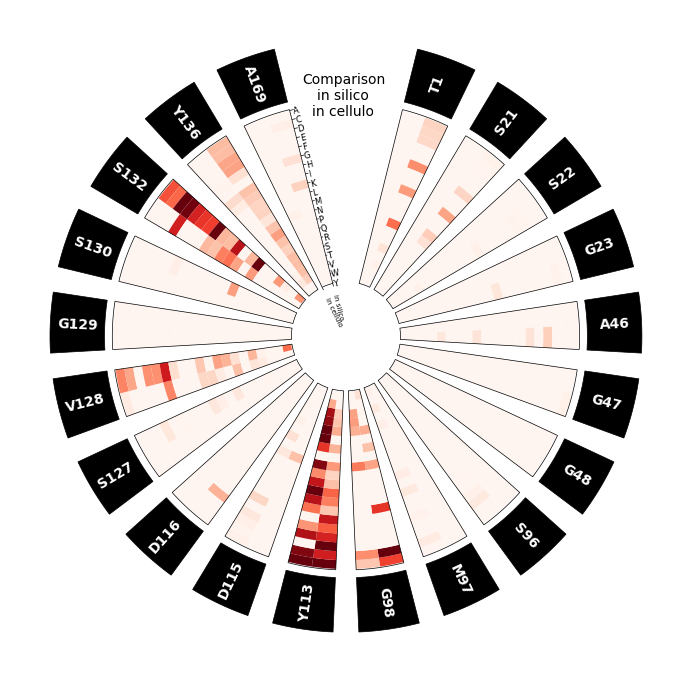

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pycirclize import Circos

Residues = sorted(list(set(df1.Residue)))
Mutations = sorted(list(set(df1["Mutation"].astype(str))))

# Create sectors based on data
sectors = {residue: len(dfi) // 2 for residue, dfi in Residues_df.items()}

# Initialize Circos plot
circos = Circos(sectors, space=5, start=14, end=346, endspace=False)

# Loop through each sector and create heatmap layers
for sector in circos.sectors:
    df = Residues_df[sector.name]
    
    # Reshape the data to match the required format
    reshaped_df = pd.DataFrame(columns=['Residue', 'Mutation', 'Source', 'Resistance'])
    for mutation in Mutations:
        for source in ['A', 'B']:
            mut_condition_row = df[(df['Mutation'] == mutation) & (df['Source'] == source)]
            reshaped_df = pd.concat([reshaped_df, mut_condition_row])
            reshaped_df.loc[reshaped_df["Source"] == "A", "Resistance"] *= 1.05

    # Pivot the dataframe to create a heatmap matrix for internal heatmap (track1)
    pivoted_df = reshaped_df.pivot(index='Source', columns='Mutation', values='Resistance')
    conversiona = pivoted_df.to_numpy()
    conversion = np.clip(conversiona, 0, 10)
    conversion = conversion.T  # Transpose to fit heatmap axis

    # Add outer track for sector name and axis
    outer_track = sector.add_track((155, 190))
    outer_track.text(sector.name, size=10, color="white", fontweight='bold', adjust_rotation=True, orientation='vertical')
    outer_track.axis(fc='black')

    # First internal heatmap track (track1) using the existing data (Reds)
    track1 = sector.add_track((35, 150), r_pad_ratio=0.01)
    track1.axis()
    track1.heatmap(conversion, vmin=0, vmax=10, cmap="Reds")

    mutation_labels = ['in cellulo', 'in silico']  # or however many match your data
    mutation_labels2 = ['Y', 'W', 'V', 'T', 'S', 'R', 'Q', 'P', 'N', 'M', 'L', 'K', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'A']

 # or however many match your data
    tick_positions = [0, 20]
    tick_positions2 = np.arange(len(mutation_labels2)) + 0
    if sector == circos.sectors[19]:
        track1.xticks(tick_positions, mutation_labels, outer=False, label_orientation='vertical', label_size=5, label_margin=5)
        track1.yticks(tick_positions2, mutation_labels2, label_size=6, label_margin=0)
#    track1.xticks(tick_positions, mutation_labels, outer=False, label_orientation='vertical', label_size=10, label_margin=5)
        
    pivoted_df2 = reshaped_df.pivot(index='Source', columns='Mutation', values='Resistance')
    conversion2a = pivoted_df2.to_numpy()
    conversion2 = np.clip(conversion2a, 0, 10)  # Example clipping transformation
    conversion2 = conversion2.T  # Transpose to fit heatmap axis

    # Add additional customization for tick marks and labels (optional)
    mutation_labels = pivoted_df.columns.tolist()
    tick_positions = np.arange(len(mutation_labels))  # Center of each heatmap column

# Add colorbar for the internal heatmap (Reds)
#circos.colorbar(bounds=(0.47, 1.2, 0.06, 0.01), vmin=0, vmax=1, orientation="horizontal", cmap="Reds")

circos.text(text="Comparison\nin silico\nin cellulo", r=155, deg=-0.6, fontsize=10)
#circos.text(text="Exp", r=155, deg=-0.6,fontsize=10)


# Draw a rectangle around the plot (optional)
circos.rect((0, 60), (0, 360), fc='none')

# Plot the figure and save the image
circos.plotfig()
plt.savefig('main3b.png', dpi=600)

/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_17157/1115623135.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reshaped_df = pd.concat([reshaped_df, mut_condition_row])
/Users/cmendozamartinez001/miniconda3/envs/prolif/lib/python3.13/site-packages/pycirclize/sector.py:159: UserWarning: r_lim=(160, 190) is unexpected plot range (0 <= r <= 100).
  warnings.warn(f"{r_lim=} is unexpected plot range (0 <= r <= 100).")
/Users/cmendozamartinez001/miniconda3/envs/prolif/lib/python3.13/site-packages/pycirclize/sector.py:159: UserWarning: r_lim=(30, 148) is unexpected plot range (0 <= r <= 100).
  warnings.warn(f"{r_lim=} is unexpected plot range (0 <= r <= 100).")
/var/folders/jf/5d2my_zj23l_8drkz9g1d1sw0000gp/T/ipykernel_17157/111

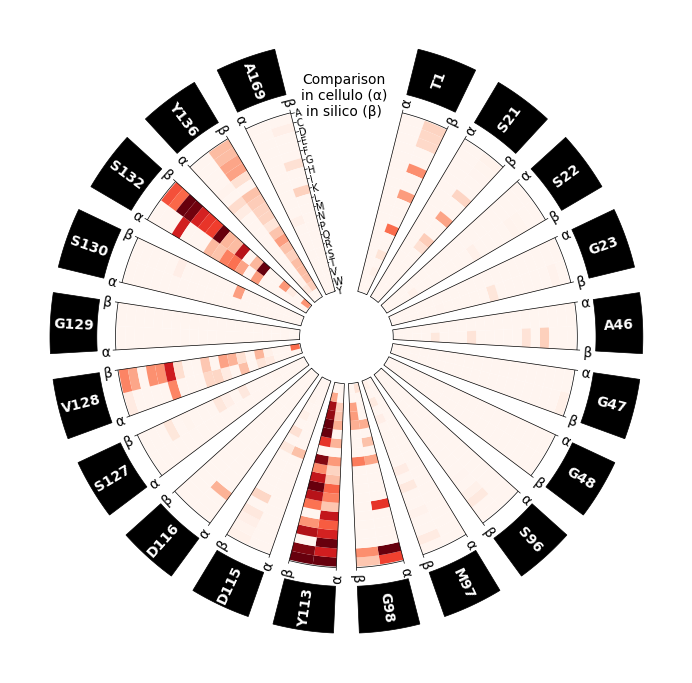

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pycirclize import Circos

Residues = sorted(list(set(df1.Residue)))
Mutations = sorted(list(set(df1["Mutation"].astype(str))))

# Create sectors based on data
sectors = {residue: len(dfi) // 2 for residue, dfi in Residues_df.items()}

# Initialize Circos plot
circos = Circos(sectors, space=5, start=14, end=346, endspace=False)

# Loop through each sector and create heatmap layers
for sector in circos.sectors:
    df = Residues_df[sector.name]
    
    # Reshape the data to match the required format
    reshaped_df = pd.DataFrame(columns=['Residue', 'Mutation', 'Source', 'Resistance'])
    for mutation in Mutations:
        for source in ['A', 'B']:
            mut_condition_row = df[(df['Mutation'] == mutation) & (df['Source'] == source)]
            reshaped_df = pd.concat([reshaped_df, mut_condition_row])
            reshaped_df.loc[reshaped_df["Source"] == "A", "Resistance"] *= 1.05

    # Pivot the dataframe to create a heatmap matrix for internal heatmap (track1)
    pivoted_df = reshaped_df.pivot(index='Source', columns='Mutation', values='Resistance')
    conversiona = pivoted_df.to_numpy()
    conversion = np.clip(conversiona, 0, 10)
    conversion = conversion.T  # Transpose to fit heatmap axis

    # Add outer track for sector name and axis
    outer_track = sector.add_track((160, 190))
    outer_track.text(sector.name, size=10, color="white", fontweight='bold', adjust_rotation=True, orientation='vertical')
    outer_track.axis(fc='black')

    # First internal heatmap track (track1) using the existing data (Reds)
    track1 = sector.add_track((30, 148), r_pad_ratio=0.01)
    track1.axis()
    track1.heatmap(conversion, vmin=0, vmax=10, cmap="Reds")

#    mutation_labels = ['E', 'P']  # or however many match your data
    mutation_labels = ['α', 'β']
    mutation_labels2 = ['Y', 'W', 'V', 'T', 'S', 'R', 'Q', 'P', 'N', 'M', 'L', 'K', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'A']

 # or however many match your data
    tick_positions = [0, 20]
    tick_positions2 = np.arange(len(mutation_labels2)) + 0
    if sector == circos.sectors[19]:
#        track1.xticks(tick_positions, mutation_labels, outer=True, label_orientation='vertical', label_size=10, label_margin=5)
        track1.yticks(tick_positions2, mutation_labels2, label_size=7, label_margin=0)
    track1.xticks(tick_positions, mutation_labels, outer=True, label_orientation='vertical', label_size=10, label_margin=2)
        
    pivoted_df2 = reshaped_df.pivot(index='Source', columns='Mutation', values='Resistance')
    conversion2a = pivoted_df2.to_numpy()
    conversion2 = np.clip(conversion2a, 0, 10)  # Example clipping transformation
    conversion2 = conversion2.T  # Transpose to fit heatmap axis

    # Add additional customization for tick marks and labels (optional)
    mutation_labels = pivoted_df.columns.tolist()
    tick_positions = np.arange(len(mutation_labels))  # Center of each heatmap column

# Add colorbar for the internal heatmap (Reds)
#circos.colorbar(bounds=(0.47, 1.2, 0.06, 0.01), vmin=0, vmax=1, orientation="horizontal", cmap="Reds")

circos.text(text="Comparison\nin cellulo (α)\nin silico (β)", r=155, deg=-0.6, fontsize=10)
#circos.text(text="Exp", r=155, deg=-0.6,fontsize=10)


# Draw a rectangle around the plot (optional)
circos.rect((0, 60), (0, 360), fc='none')

# Plot the figure and save the image
circos.plotfig()
plt.savefig('main3b.png', dpi=600)